# Case Study 2 - Predicting Hospital Readmittance

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Abstract](#abstract)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Feature Removal](#feature-removal)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Sampling & Scaling Data](#sampling-scaling-data)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations and Model Enhancements](#model-enhancements)
    - [Alternative Modeling Approaches](#alternative-modeling-approaches)

# Business Understanding & Executive Summary <a id='business-understanding'/>

### Objective<a id='scope'/>
This case study involves analyzing a ten-year study tracking diabetic patient readmission into hospitals. The goal of the analysis is to predict when diabetic patients are likely to be readmitted to a hospital based on the available data and determine if any of the provided factors are particularly indicative of a high chance of readmission.

### Introduction <a id='introduction'/>
Diabetes is a common disease that affects the body's ability to regulate blood sugar levels naturally. According to the American Heart Association [1], there are two main types of diabetes which involve issues with insulin. This hormone regulates how cells absorb glucose from the bloodstream. Type 1 diabetes describes the chronic form that is usually identified at a young age in which the body is unable to produce sufficient insulin. Type 2 diabetes, the most common condition, can arise later in life and occurs when the body develops an "insulin resistance" or its insulin production begins to diminish.
Complications involving the effects of diabetes on the heart and circulatory system can lead to dire conditions that require hospitalization. Often patients are released from the hospital but may have to be readmitted soon after with recurring issues, causing additional strain on both the patients' livelihoods and the efficiency of the hospital. 

The data provided for this case study is requisitioned from a ten-year study on hospital readmissions of diabetic patients. This analysis aims to predict when diabetic patients are likely to be readmitted to the hospital after a visit given the provided information and if that readmission will occur in less than 30 days. Based on a predictive model, the most influential indicators of probable readmissions can be identified so that medical professionals can make better judgments on whether a diabetic patient is ready to be released. Since diabetes is estimated to affect 463 million people worldwide [2], any improvement in this regard would have far-reaching significant benefits.

### EDA <a id='eda'/>
Two data CSV files are used for the analysis, "diabetic_data.csv" and "IDs_maping.csv". The “diabetic_data” dataset is based on the multi-year study of diabetes patients, and each row represents an individual's hospital visit. The patients' information is systematically collected from the point of entry to that of discharge. It can be broadly classified into a few categories:
Personal information
- The admission situations and conditions
- The laboratory tests conducted
- The physician's diagnosis
- The treatments and medications
- The discharge conditions

This dataset contains 50 features and 101,766 rows, including the response variable readmission information. In the diabetic_data file, the team identified trends and missing data. Following are a few observations:
- <b>The response variable is unbalanced with a 89:11 split between "not readmitted within 30 days" vs. "readmitted within 30 days".</b>  This imbalance will be addressed throughout this case study.  
- The imbalance was observed to be very similar in the male and female samples.
- Pair plots of continuous variables did not show any obvious correlations or outliers among continuous variables, but they were right-skewed, zero-inflated, and/or discrete.  See the full EDA section below.  Team decided to proceed without transformation or recoding.  

The race variable was identified as a potential ethical concern and a sensitive discussion topic. Hospitals are typically required by state law to collect demographic information like race and ethnicity. and the 1964 Civil Rights Act allows hospitals to collect this data to ensure no discrimination in care. However, including race could result in a model that reinforces negative racial biases in healthcare.   
- Data showed more samples for the Caucasian race vs. other races. However, the ratio of the patient taking diabetic medication vs. total patients within the race is very similar (range from 74% to 80%). 

The team looked at data in the "ID_mapping.csv" file. This file contains the IDs for multiple categorical variables and a brief description of each.  This is explored further in Missing Values.   

### Methods <a id='methods'/>
The objective of our analysis is to classify diabetes patients who have the highest risk of being re-admitted to the hospital within 30 days using logistic regression modeling. L2 (Ridge) regularization was used to prevent overfitting without reducing model performance.  The team observed that L2 is faster and more efficient to run than L1 with this dataset which had a large number of dummy-coded variables.

The metrics used to evaluate model performance were precision and recall.  Precision and recall are useful metrics when the classes are imbalanced like in this dataset.  These metrics are defined as follows:    
- Recall = TP/(TP+FN)
- Precision = TP/(TP+FP)

Where:
- True Positive (TP) is "patients correctly predicted to be readmitted within 30 days".  These predictions would help keep a patient in the hospital longer for observation rather than discharging them, because they would be at risk to be readmitted within 30 days.   
- False Negative (FN) is "patients <b>in</b>correctly predicted to <b>not</b> be readmitted within 30 days".  These predictions would likely discharge a patient too soon, resulting in readmittance within 30 days.  
- False Positive (FP) is "patients <b>in</b>correctly predicted to be readmitted within 30 days".  These predictions would likely keep people in the hospital that don't need to be there and are at low risk for readmittance within 30 days.  

Both Recall and Precision focus the modeling on True Positives, but Recall is penalized by False Negatives whereas Precision is penalized by False Positives.  A scatterplot of Precision vs. Recall (a PR Curve) can be used to tune the False Negatives vs. False Positive for any given model. 

In the best interest of the patient, the model would maximize Recall such that hospital readmission is prevented at all costs. However, the resulting lower precision (higher false positive rate) would be costly.  It could lead to a shortage of beds or staff in the hospital, keeping more patients that are fine and that wouldn't be readmitted if dishcarged.  To balance both precision and recall, the team used the F1 score.  The F1 score combines precision and recall into a single metric by taking their harmonic mean:

F1 = 2 * Recall * Precision / (Recall + Precision)   

By maximizing the F1 score, the model balances both recall and precision for the positive class.   

### Train and Test Data Split <a id='Train and Test Data Split'/>
The response variable is unbalanced with 11% of patients readmitted within 30 days and 89% not readmitted within 30 days. Stratified data splitting was used to ensure that these two clases are evenly split between the training and test sets.  A 70/30 split was used between the training and test sets.  Stratified data splitting  Dataset was split in training and test set before imputation. The continuous variables were scaled to ensure high magnitude variables were not influencing the outcome more than low magnitude variables.  

## Missing Values <a id='missing-values'>
No missing values were observed in any continuous features or the response variable. Missing values, entered as "??", were observed in several categorial features (see table below).  Missing values were also observed in the ID_Mapping level descriptions entered as NULL, Not Available, unknown/Invalid, and Not Mapped. NaN replaced all of these missing values in both the diabetic_data and ID_Mapping datasets, and then they were merged for analysis.        
    
The team investigated whether these missing values had any internal correlation or dependency. ***A heatmap did not show any obvious overlap or correlation with the missing values.***
    
The diagnosis codes in columns diag_1, diag_2, and diag_3 reference Internation Classification of Diseases (ICD) codes. The data hierarchy of these codes was used to reduce the number of category levels from 700-800 each to just 19 each.  This significantly reduced the number of dummy variables and made imputation much simpler.  See the Remapping Data code below for more details.    
https://www.aapc.com/codes/icd9-codes-range/
    
Following are the variables with missing values and the methodology the team used to mitigate the missing values:

| Missing Variable                 | # of missing values | Mitigation Methodology                                     |
|----------------------------------|---------------------|------------------------------------------------------------|
| weight                           | 98,569              | ~97% of data was missing so variable was dropped.          |
| race                             | 2,273               | Impute by Mode                                             |
| payer_code                       | 40,256              | Impute by Mode                                             |
| medical Specialty                | 49,949              | Group by admission_type_id_new_mapping then Impute by Mode |
| disharge_disposition_new_mapping | 4,680               | Impute by Mode                                             |
| admission_source_new_mapping     | 7,067               | Impute by Mode                                             |
| diag_1                           | 21                  | Recategorize and Impute by Mode                            |
| diag_2                           | 358                 | Recategorize and Impute by Mode                            |
| diag_3                           | 2,423               | Recategorize and Impute by Mode                            |

The team decided to fill the missing values of race by the mode, Caucasian. The occurrence of missing information for race is relatively low, so there shouldn't be much concern for inadvertently creating any artificial trends in the model.  Refer to the EDA section above for more information on this.  

KNN Imputation Methodology:  Team also looked at KNN imputation to address missing values as there was no perfect correlation observed among missing variables. The team found that KNNImputer in sklearn only had Euclidian distance available which is not appropriate for the number of categorical variables in the dataset. The team decided to drop the KNN imputation and follow the imputation approach listed above.
 
### Other Data Cleanup <a id='Other Data Cleanup'/>
The team reviewed the data in detail after addressing the missing values. Features that are not meaningful such as encounter_id, patient_nbr, examide, and citoglipton are removed from the analysis. encounter_id and patient_nbr are row id codes and will not add value to the model. examide and citoglipton variables have all zeros. 
 
Additionally, we removed rows with a discharge_disposition_id = "expired", which indicated the patient has diseased, thus they cannot be readmitted.  The team assumes the end users don't need a model to correctly predict this outcome. 

|disharge_disposition|readmit|count
|----|----|----|
|expired|False|1652|
|expired|True|0|


### Logistic Regression Modeling <a id='Logistic Regression Modeling'/>
Logistic regression is a classification algorithm. It is used to predict a binary outcome based on the set of independent variables. Logistic regression is used for the analysis when working with the binary target variable, i.e., dichotomous, or categorical in nature; in other words, if it fits into one of two categories (such as “yes” or “no”, “pass” or “fail”, 0 or 1). The response variable used for this analysis also has dichotomous data, so the team decided to use Logistic Regression to analyze the diabatic data.
    
Logistic Regression models were built using L2 (Ridge) regularization and weighting the log loss function by the target class (class_weight = "balanced").  The team used this weighting option to deal with the imbalance of the target class variable. This option balanced how the model predicted probabilities for the negative and positive classes such that the default threshold of 0.5 would predict more of the positive class.  Using this approach, the F1 score was maximized by tuning the regularization penalty (C) and the threshold.   

Baseline Model:
There were no missing values in the 8 continuous variables, so the team built the baseline model using continuous variables only with Logistic Regression.  The team utilized this base model to see how the data looked without dummy coding or imputation, as well as assessing the value of adding multi-level categorical variables with more complex models.

Final Model:
The final Logistic Regression model was made using all of the variables. This dataset was built after recoding the categorical values and imputing any missing data.  
    
### Results <a id='results'/>

The baseline model had the following metrics:

| Group    | Precision | Recall | f1-score | accuracy |
|----------|-----------|--------|----------|----------|
| Training | 0.19      | 0.39   | 0.26     | 0.74     |
| Test     | 0.19      | 0.38   | 0.25     | 0.74     |

The baseline model performance was consistent between the training and test sets.  

The baseline model had a <b>recall of 38-39%</b> and precision of 18% (f1-score = 25-26%).      

<br>  

The final model had the following metrics:

| Group    | Precision | Recall | f1-score | accuracy |
|----------|-----------|--------|----------|----------|
| Test     | 0.18      | 0.48   |  0.27    | 0.71     |
| Training | 0.18      | 0.47   |  0.26    | 0.70     |

The final model performance was consistent between the training and test sets.  

The final model had a <b>recall of 47-48%</b> and precision of 18% (f1-score = 26-27%).  This was a 10% incremental improvement in the recall (and a 3-4% drop in accuracy).  The final model accurately predicts approximately 1 in 2 patients that will be readmitted within 30 days.  
    
### Model Interpretation 
    
The three most important factors in the final model were all negatively correlated with readmittance within 30 days:
- Otolaryngology (a.k.a. Ears, Nose, and Throat)
- Gynecology
- Diagnoses for "Complications in Child Birth" (K)   

The three most important factors in the final model that were positively correlated with readmittance within 30 days:
- Allergy and Immunology
- Hematology
- Discharge Disposition = "Admitted"   

Race was not in the top 15 most important factors and could likely be removed from the model if needed.    
    
Input from domain knowledge experts is needed to asses why these variables were the most important and negatively correlated with the response.  

Variables were assessed for importance after centering and scaling continuous variables and one-hot-encoding categorical variables such that they all range from 0 to 1.  Using this approach, all of the variables are on equivalent scales and their importance can be directly assessed by their model coefficients.  The 15 most important features are presented in the bar plot below.       

<img src="plots/final_model_factor_barplot.png" width=400 height=400 />    

## Conclusion
    
We are proposing a classification model that predicts readmittance to the hospital within 30 days with a 25% F1 score (47% Recall and 18% Precision).  This model maximizes the F1 score which maximizes both Recall and Precision in a balanced way such that both patients and hospitals can manage their risk effectively.    

The model helps identify patients at high risk of readmission within 30 days and patients with a low risk of readmission that can be discharged.  Our model identifies top risk factors for readmittance within 30 days which the hospital staff can use as focus areas when deciding to keep or discharge a patient.  This model is not perfect and should be used as a guide rather than gospel.  Additional feature engineering and domain knowledge experts are needed to guide model improvements.        

### Future Considerations
    
The data were aggregated from multiple hospitals and may not be generalizable across health care systems, geography, etc. Hospitals may want to develop models with their own data or regional data to guide their staff on discharge decisions.  

Need a conversation with stakeholders and domain experts regarding:
- Balance of precision vs. recall.  What is the cost of a false positive vs. a false negative?  
- Level of detail with diagnoses columns (diag 1-3).  We generalized these diagnoses such that there were fewer levels to model.  We recommend reviewing the top factor recoded diagnoses categories to see if any warrant a deeper dive
    
### Other Models

Other classification modeling techniques - Naive Bayes, Random Forest, Boosted Decision Trees
    
### References <a id='References'/>
[1] American Heart Association. What is Diabetes? https://www.heart.org/en/health-topics/diabetes/about-diabetes
[2] "IDF DIABETES ATLAS Ninth Edition 2019" (PDF). www.diabetesatlas.org. Retrieved 18 May 2020.
[3] What is Logistic Regression? A Beginner's Guide [2022] (careerfoundry.com)

# Data Evaluation <a id='data-evaluation'>
    

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedGroupKFold
from sklearn.impute import SimpleImputer

# prediction models
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from kneed import KneeLocator
from scipy import stats

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve as pr_curve
from sklearn.metrics import plot_precision_recall_curve as plot_pr_curve
from sklearn.metrics import auc

# import warnings filter
import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

## Loading Data <a id='loading-data'>

### Id Mappings

#### Admission Type

In [2]:
url = 'https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/dataset_diabetes/IDs_mapping.csv'
admission_type_mapping = pd.read_csv(url, nrows=8, index_col=0)
admission_type_mapping

,description
admission_type_id,
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NaN
7,Trauma Center
8,Not Mapped


#### Discharge Disposition

In [3]:
discharge_disposition_mapping = pd.read_csv(url, nrows=30,skiprows=10, index_col=0 )
discharge_disposition_mapping 

,description
discharge_disposition_id,
1,Discharged to home
2,Discharged/transferred to another short term h...
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpa...
6,Discharged/transferred to home with home healt...
7,Left AMA
8,Discharged/transferred to home under care of H...
9,Admitted as an inpatient to this hospital


#### Admission Source Mapping

In [4]:
admission_source_mapping = pd.read_csv(url,skiprows=42, index_col=0 )
admission_source_mapping

,description
admission_source_id,
1,Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5,Transfer from a Skilled Nursing Facility (SNF)
6,Transfer from another health care facility
7,Emergency Room
8,Court/Law Enforcement
9,Not Available


## Diabetes Dataset

In [5]:
url = 'https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/dataset_diabetes/diabetic_data.csv'
df = pd.read_csv(url,na_values='?');

## Data Summary <a id='data-summary'>

| Feature name                | Type    | Description and values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|-----------------------------|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Encounter ID                | Numeric | Unique identifier of an encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| Patient number              | Numeric | Unique identifier of a patient                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Race                        | Nominal | Values: Caucasian, Asian, African American, Hispanic, and other                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| Gender                      | Nominal | Values: male, female, and unknown/invalid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Age                         | Nominal | Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Weight                      | Numeric | Weight in pounds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| Admission type              | Nominal | Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Discharge disposition       | Nominal | Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Admission source            | Nominal | Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Time in hospital            | Numeric | Integer number of days between admission and discharge                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Payer code                  | Nominal | Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Medical specialty           | Nominal | Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Number of lab procedures    | Numeric | Number of lab tests performed during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Number of procedures        | Numeric | Number of procedures (other than lab tests) performed during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Number of medications       | Numeric | Number of distinct generic names administered during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Number of outpatient visits | Numeric | Number of outpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Number of emergency visits  | Numeric | Number of emergency visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Number of inpatient visits  | Numeric | Number of inpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Diagnosis 1                 | Nominal | The primary diagnosis (coded as first three digits of ICD9); 848 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Diagnosis 2                 | Nominal | Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Diagnosis 3                 | Nominal | Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Number of diagnoses         | Numeric | Number of diagnoses entered to the system                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Glucose serum test result   | Nominal | Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| A1c test result             | Nominal | Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.                                                                                                                                                                                                                                                                                                                                                                                                              |
|                             |         |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| Change of medications       | Nominal | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Diabetes medications        | Nominal | Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 24 features for medications | Nominal | For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed |
| Readmitted                  | Nominal | Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.                                                                                                                                                                                                                                                                                                                                                                                                                                                          |

## Remapping Data

### Re-mapping data based on ID mappings

In [6]:
def remapIds(*new_mappings: tuple) -> dict:
    mapping_dict = dict()
    for mapping in new_mappings:
        mapping_dict[mapping[1]] =  mapping[0].map(mapping[2])
    return mapping_dict

def refactorMappingIds(inputDf: pd.DataFrame) -> pd.DataFrame:
    admission_type_id_new_mapping = {
        1: "emergency",
        2: "urgent",
        3: "elective",
        4: "newborn",
        5: float("NaN"),
        6: float("NaN"),
        7: "trauma-center",
        8: float("NaN")
    }
    
    disharge_disposition_new_mapping = {
        1: "discharged",
        2: "transfer",
        3: "transfer",
        4: "transfer",
        5: "transfer",
        6: "transfer",
        7: "ama",
        8: "transfer",
        9: "admitted",
        10: "transfer",
        11: "expired",
        12: "admitted",
        13: "hospice",
        14: "hospice",
        15: "transfer",
        16: "transfer",
        17: "transfer",
        18: float("NaN"),
        19: "expired",
        20: "expired",
        21: "expired",
        22: "transfer",
        23: "transfer",
        24: "transfer",
        25: float("NaN"),
        26: float("NaN"),
        27: "transfer",
        28: "transfer",
        29: "transfer",
    }


    admission_sourcing_new_mapping = {
        1: "referral",
        2: "referral",
        3: "referral",
        4: "transfer",
        5: "transfer",
        6: "transfer",
        7: "emergency",
        8: "law-enforcement",
        9: float("NaN"),
        10: "transfer",
        11: "normal-delivery",
        12: "other-delivery",
        13: "other-delivery",
        14: "other-delivery",
        15: float("NaN"),
        17: float("NaN"),
        18: "transfer",
        19: "transfer",
        20: float("NaN"),
        21: float("NaN"),
        22: "transfer",
        23: "normal-delivery",
        24: "normal-delivery",
        25: "transfer",
        26: "transfer"
    }
    df = inputDf.copy()
    mapping_tuples = [
        (df['discharge_disposition_id'],'disharge_disposition_new_mapping', disharge_disposition_new_mapping),
        (df['admission_source_id'],'admission_source_new_mapping', admission_sourcing_new_mapping),
        (df['admission_type_id'], 'admission_type_id_new_mapping', admission_type_id_new_mapping)
    ]
    remappings = remapIds(*mapping_tuples)
    for newMappingKey in remappings:
        df[newMappingKey] = remappings[newMappingKey]
    return df

### Remapping Diag(nosis) Codes based on International Classification of Diseases (ICD) codes

Below you'll find a link to the ICD ranges we used to remap features __diag_1__, __diag_2__, and __diag_3__: <br>
https://www.aapc.com/codes/icd9-codes-range/

In [7]:
def getDiagCategory(input: float) -> str:
    val: str
    if input < 1:
        val = float("NaN")
    elif input < 140:
        val = 'A'
    elif input < 240:
        val = 'B'
    elif input < 280:
        val = 'C'
    elif input < 290:
        val = 'D'
    elif input < 320:
        val = 'E'
    elif input < 390:
        val = 'F'
    elif input < 460:
        val = 'G'
    elif input < 520:
        val = 'H'
    elif input < 580:
        val = 'I'
    elif input < 630:
        val = 'J'
    elif input < 680:
        val = 'K'
    elif input < 710:
        val = 'L'
    elif input < 740:
        val = 'M'
    elif input < 760:
        val = 'N'
    elif input < 780:
        val = 'O'
    elif input < 800:
        val = 'P'
    elif input < 1000:
        val = 'Q'
    elif input < 2000:
        val = 'R'
    elif input < 3000:
        val = 'S'
    else:
        val = 'Z'
    return val
    

def categorizeDiag(diag: pd.Series) -> pd.Series:
    df = diag.copy()
    df.fillna(0,inplace=True)
    df.mask(df.str.startswith('V', na=False),1000, inplace=True)
    df.mask(df.str.startswith('E', na=False),2000, inplace=True)
    df = pd.to_numeric(df)
    df = df.map(getDiagCategory)
    return df


def recategorizeDiags(inputDf: pd.DataFrame) -> pd.DataFrame:
    df = inputDf.copy()
    df['diag_1_categorized'] = categorizeDiag(df['diag_1'])
    df['diag_2_categorized'] = categorizeDiag(df['diag_2'])
    df['diag_3_categorized'] = categorizeDiag(df['diag_3'])
    return df


def addDiag(*diags):
    df = None
    for diag in diags:
        if (df is None):
            df = diag.notna().astype(int)
        else:
            df = df + diag.notna().astype(int)
    return df

In [8]:
def recategorizeData(inputDf: pd.DataFrame) -> pd.DataFrame:
    df = inputDf.copy()
    df = refactorMappingIds(df)
    df = recategorizeDiags(df)
    df['total_diag'] = addDiag(df['diag_1'],df['diag_2'],df['diag_3'])
    return df

In [9]:
df_recategorized = recategorizeData(df)

### Recoding Dependant Variable

In [10]:
def recode_variable(series: pd.Series, condition):
    s_copy = series.copy()
    s_copy = s_copy==condition
    s_copy = s_copy.astype(int)
    return s_copy

In [11]:
df_recategorized['readmitted'] = recode_variable(df_recategorized['readmitted'], '<30')

## Missing Values

&emsp; No missing values were observed in any continuous variables. All the missing values were observed in just 9 of the 42 categorial features (see table below).  There were also missing values observed in Id_mapping files as mentioned in the EDA section above.  
    
&emsp; The team investigated whether these missing values have any internal correlation or dependency. ***A heatmap did not show any obvious overlap or correlation with the missing values.***

&emsp; The diagnosis codes in columns diag_1, diag_2, and diag_3 reference Internation Classification of Diseases (ICD) codes. The data hierarchy of these codes was leveraged to reduce the number of category levels from 700-800 each to just 19 each.  This significantly reduced the number of dummy variables and made imputation much simpler.  See the code below for more details.    
https://www.aapc.com/codes/icd9-codes-range/

Following are the variables with the missing values:

| Missing Variable                 | # of missing values | 
|----------------------------------|---------------------|
| weight                           | 98,569              | 
| race                             | 2,273               | 
| payer_code                       | 40,256              | 
| medical Specialty                | 49,949              | 
| disharge_disposition_new_mapping | 4,680               | 
| admission_source_new_mapping     | 7,067               | 
| diag_1                           | 21                  | 
| diag_2                           | 358                 | 
| diag_3                           | 2,423               | 

&emsp; The race variable is identified as a potential ethical concern and a sensitive discussion topic, and the team decided to fill the missing values of race by the mode, Caucasian. The occurrence of missing information for race is relatively low, so there shouldn't be much concern for inadvertently creating any artificial trends in the model.

In [12]:
df_recategorized.isna().sum()

encounter_id                            0
patient_nbr                             0
race                                 2273
gender                                  0
age                                     0
weight                              98569
admission_type_id                       0
discharge_disposition_id                0
admission_source_id                     0
time_in_hospital                        0
payer_code                          40256
medical_specialty                   49949
num_lab_procedures                      0
num_procedures                          0
num_medications                         0
number_outpatient                       0
number_emergency                        0
number_inpatient                        0
diag_1                                 21
diag_2                                358
diag_3                               1423
number_diagnoses                        0
max_glu_serum                           0
A1Cresult                         

## Feature Removal <a id='feature-removal'>

&emsp; The team reviewed the data in detail after addressing the missing values. Features that are not meaningful such as __encounter_id__, __patient_nbr__, __examide__, and __citoglipton__ are removed from the analysis. encounter_id and patient_nbr are id codes and will not add value to the model. examide, and citoglipton variables have all zeros. 
 
&emsp; Additionally, we remove rows with a __disharge_disposition__ ids that were labeled as __expired__, which indicated the patient has diseased, thus they will not be readmitted. 


In [13]:
df_recategorized = df_recategorized.drop(['patient_nbr','encounter_id', 'examide', 'weight','citoglipton'], 1);

&emsp; Also, the following feature recoded and remapped into new variables to a smaller subset of levels, thus the original features are no longer needed.

discharge_disposition_id
admission_source_id
admission_type_id
diag_1
diag_2
diag_3

df_recategorized = df_recategorized.drop(['discharge_disposition_id','admission_source_id','admission_type_id','diag_1',
                'diag_2','diag_3'], 1);

In [15]:
df_recategorized = df_recategorized[df_recategorized['disharge_disposition_new_mapping']!='expired']
df_recategorized.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis (EDA) <a id='eda'>

### Response - Readmitted

<img src="plots/readmitted.png" width=300 height=300 />   

### Feature Collinearity & Outliers <a id='feature-collinearity'>
No collinearity or outliers were identified based on the pairs plot of the continuous variables below.  Several "continuous" variables are right-skewed, discrete, and/or zero-inflated based on the kernel density plots on the main diagonal.  There are not obvious shifts or separation in the response variable (blue and orange) vs. the continuous variables.  

"outpatient" and "emergency" distributions were more closely examined used a log scale for count in the second figure below.
    
<img src="plots/cont_feature_vs_readmit_pairplot.png" width=1100 height=1100 />
   
<img src="plots/outpatient_emergency_histplot.png" width=600 height=600 />    

## Assumptions <a id='assumptions'>

* We assume the ICD codes are groupable
* Expired means patient has diseased
* For discharge_dispostion_id and admission_sourcing_id we combined Ids that had similar descriptions such as referral, transfer, and expired. During our EDA they appear to behave similarly. 
*  After cleanup and imputation data has sufficient information to predict or estimate readmissions. 

# Model Preparations <a id='model-preparations'/>

## Modeling Method Proposed

&emsp; The objective of our analysis is to classify diabetes patients who have the highest risk of being re-admitted to the hospital within 30 days using logistic regression modeling. L2 regularization was used to prevent overfitting and maintain model performance.  The team observed that L2 is faster and more efficient to run than L1 with this dataset that had a large number of dummy-coded variables.

&emsp; The metrics used to evaluate model performance were precision and recall.  Precision and recall are useful metrics when the classes are imbalanced.  These metrics are defined as follows:    
- Recall = TP/(TP+FN)
- Precision = TP/(TP+ FP)

where TP = True Positives, FN = False Negatives, and FP = False Positives



## Model Appropriateness

&emsp; Logistic regression is a classification algorithm. It is used to predict a binary outcome based on the set of independent variables. Logistic regression is used for the analysis when working with the binary target variable, i.e., dichotomous, or categorical in nature; in other words, if it fits into one of two categories (such as “yes” or “no”, “pass” or “fail”, 0 or 1). The response variable used for this analysis also has dichotomous data, so the team decided to use Logistic Regression to analyze the diabatic data. 

## Evaluation Metrics
&emsp; The metrics used to evaluate model performance were precision and recall.  Precision and recall are useful metrics when the classes are imbalanced like in this dataset.  These metrics are defined as follows:    
- Recall = TP/(TP+FN)
- Precision = TP/(TP+FP)

Where:
- True Positive (TP) is "patients correctly predicted to be readmitted within 30 days".  These predictions would help keep a patient in the hospital longer for observation rather than discharging them, because they would be at risk to be readmitted within 30 days.   
- False Negative (FN) is "patients <b>in</b>correctly predicted to <b>not</b> be readmitted within 30 days".  These predictions would likely discharge a patient too soon, resulting in readmittance within 30 days.  
- False Positive (FP) is "patients <b>in</b>correctly predicted to be readmitted within 30 days".  These predictions would likely keep people in the hospital that don't need to be there and are at low risk for readmittance within 30 days.  

Both Recall and Precision focus the modeling on True Positives, but Recall is penalized by False Negatives whereas Precision is penalized by False Positives.  A scatterplot of Precision vs. Recall (a PR Curve) can be used to tune the False Negatives vs. False Positive for any given model. 

To balance both precision and recall, the team used the F1 score.  The F1 score combines precision and recall into a single metric by taking their harmonic mean:

F1 = 2 * Recall * Precision / (Recall + Precision)   

By maximizing the F1 score, the model balances both recall and precision for the positive class.  Additionally, we used the Precision-Recall (PR) curve to generate all F1 scores and find the maximum F1 score and its associated threshold.

## Model Usefulness
&emsp; In the best interest of the patient, the model would maximize Recall such that hospital readmission is prevented at all costs. However, the resulting lower precision (higher false positive rate) would be costly.  It could lead to a shortage of beds or staff in the hospital, keeping more patients that are fine and that wouldn't be readmitted if dishcarged.  For the model to be useful, it needs to balance the trade-off between recall and precision.  A more useful model would have a higher F1 score with higher recall and/or precision.  

## Split dependant and Independant Variables

In [16]:
def split_dependant_and_independant_variales(df: pd.DataFrame, y_var: str):
    X = df.copy()
    y = X[y_var]
    X = X.drop([y_var], axis=1)
    return X, y

In [17]:
X, y = split_dependant_and_independant_variales(df_recategorized, 'readmitted')

## Data Imputation

In [18]:
def fitImputers(x_train: pd.DataFrame): 
    df = x_train.copy()
    imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')
    columns_of_interest = ['disharge_disposition_new_mapping', 'admission_source_new_mapping', 'admission_type_id_new_mapping', 'diag_1_categorized', 'diag_2_categorized', 'diag_3_categorized', 'race', 'payer_code']
    imputer.fit(df[columns_of_interest])
    
    grouped_modes = df.groupby(['admission_type_id_new_mapping'])['medical_specialty'].agg(pd.Series.mode)
    grouped_modes['trauma-center'] = grouped_modes['urgent']
    
    def customApply(input):
        if(pd.isnull(input[1])):
            input[1] = grouped_modes[input[0]]
        return input
    return imputer, customApply

In [19]:
def imputeData(x_train: pd.DataFrame, x_test: pd.DataFrame):
    imputed_train = x_train.copy()
    imputed_test = x_test.copy()

    imputer, customApply = fitImputers(x_train)
    columns_of_interest = ['disharge_disposition_new_mapping', 'admission_source_new_mapping', 'admission_type_id_new_mapping', 'diag_1_categorized', 'diag_2_categorized', 'diag_3_categorized', 'race', 'payer_code']
    imputed_train[columns_of_interest] = imputer.transform(imputed_train[columns_of_interest])
    imputed_test[columns_of_interest] = imputer.transform(imputed_test[columns_of_interest])
    
    twoColumnsTrain = imputed_train[['admission_type_id_new_mapping','medical_specialty']]
    twoColumnsTest = imputed_test[['admission_type_id_new_mapping','medical_specialty']]
    
    twoColumnsTrain.apply(customApply, axis=1);
    twoColumnsTest.apply(customApply, axis=1);
    
    
    imputed_train['medical_specialty'] = twoColumnsTrain['medical_specialty']
    imputed_test['medical_specialty'] = twoColumnsTest['medical_specialty']
    
    imputed_train.to_csv('diabetic_data_train_imputed.csv')
    imputed_train = pd.read_csv('diabetic_data_train_imputed.csv')
    
    
    imputed_test.to_csv('diabetic_data_test_imputed.csv')
    imputed_test = pd.read_csv('diabetic_data_test_imputed.csv')
    
    imputed_train = imputed_train.drop(['Unnamed: 0'], 1)
    imputed_test = imputed_test.drop(['Unnamed: 0'], 1)
    
    return imputed_train, imputed_test

## Sampling & Scaling Data <a id='sampling-scaling-data' />

In [20]:
def shuffle_split(X, y, test_size, random_state):
    stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in stratified_shuffle_split.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

def scale_data(X_train, X_test):
    scl = StandardScaler()
    scl.fit(X_train)
    X_train_scaled = pd.DataFrame(scl.transform(X_train), columns = X_train.columns.values, index = X_train.index)
    X_test_scaled = pd.DataFrame(scl.transform(X_test), columns = X_train.columns.values, index = X_test.index )
    return X_train_scaled, X_test_scaled


def encode_data(X_train, X_test):
    enc = OneHotEncoder(handle_unknown = 'ignore')
    enc.fit(X_train)
    X_train_encoded = pd.DataFrame( enc.transform(X_train).toarray(), 
                                   columns = enc.get_feature_names(X_train.columns), index = X_train.index)
    X_test_encoded = pd.DataFrame(enc.transform(X_test).toarray(), 
                                  columns = enc.get_feature_names(X_test.columns), index = X_test.index)
    return X_train_encoded, X_test_encoded

def scale_and_encode_data(x_train, x_test):
    cont_vars = x_train._get_numeric_data().columns
    X_cont_train_scaled, X_cont_test_scaled = scale_data(x_train[cont_vars], x_test[cont_vars])
    X_train_encoded, X_test_encoded = encode_data(x_train.drop(cont_vars, 1), x_test.drop(cont_vars, 1))
    return pd.concat([X_cont_train_scaled, X_train_encoded], axis=1), pd.concat([X_cont_test_scaled, X_test_encoded], axis=1)

## Prepare for Modeling

In [21]:
def model_preparation(X, y, test_split, random):
    X_train, X_test, y_train, y_test = shuffle_split(X, y, test_size = test_split, random_state= random)
    X_train, X_test = scale_and_encode_data(*imputeData(X_train, X_test))
    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = model_preparation(X,y,0.3,1234)

# Model Building & Evaluations <a id='model-building'/>

Analysis of your models performance

## Handling missing values
    
Following are the variables with the missing values and the methodology team used to mitigate the missing values:

| Missing Variable                 | # of missing values | Mitigation Methodology                                     |
|----------------------------------|---------------------|------------------------------------------------------------|
| weight                           | 98,569              | ~97% of data was missing so variable was dropped.          |
| race                             | 2,273               | Impute by Mode                                             |
| payer_code                       | 40,256              | Impute by Mode                                             |
| medical Specialty                | 49,949              | Group by admission_type_id_new_mapping then Impute by Mode |
| disharge_disposition_new_mapping | 4,680               | Impute by Mode                                             |
| admission_source_new_mapping     | 7,067               | Impute by Mode                                             |
| diag_1                           | 21                  | Recategorize and Impute by Mode                            |
| diag_2                           | 358                 | Recategorize and Impute by Mode                            |
| diag_3                           | 2,423               | Recategorize and Impute by Mode                            |

## Sampling Methodology

&emsp; The response variable is a somewhat unbalanced with 11% readmitted within 30 days and 89% not readmitted within 30 days. Stratified data splitting was used to ensure that these two clases are evenly split between the training and test sets.  A 70/30 split was used between the training and test sets.  Stratified data splitting  Dataset was split in training and test set before imputation. The continuous variables were scaled to ensure high magnitude variables were not influencing the outcome more than low magnitude variables.  

## Model Setup

&emsp; For penalty we used L2 regularization to prevent overfitting and maintain model performance. The team observed that L2 is faster and more efficient to run than L1 with this dataset that had a large number of dummy-coded variables. Given the dependent variable imbalance we decided to apply weights to the coefficiens by providing 'balanced' as parameter to the model. Lastly we iterated over a range of Cs which is the inverse of regularization strength to optimized the model for f1-score. The team decided to used the liblinear solver as it was one of the supported solvers when using l2 regularization and from our modeling this solver converged (not all converged) and it converged relatively quickly compared to the others solvers. 
 

In [23]:
def run_lgr(penalty, c, x_train, x_test, y_train, y_test):
    lgr = LogisticRegression(penalty=penalty, C=c, solver='liblinear', class_weight='balanced')
    lgr.fit(x_train,y_train)
    y_hat_train = lgr.predict(x_train)
    score = f1_score(y_train, y_hat_train)
    return lgr, score

def run_lgr_key(e):
    return e[1]

In [24]:
def run_lgr_key(e):
    return e[1]

In [25]:
X_train, X_test, y_train, y_test = model_preparation(X,y,0.3,1234)

In [26]:
C_s = np.linspace(0.2, 2, 10)
C_s

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [27]:
def find_best_model(model_key, C_s, x_train, x_test, y_train, y_test):
    lgrs = []
    for count, c in enumerate(C_s): 
        lgr, score = model_key[0]('l2', c, x_train, x_test, y_train, y_test)
        print(count+1 , 'out of ', len(C_s), 'jobs | C: ', round(c,1), ' | Score: ', score)
        lgrs.append((lgr,score))
    
    best_lgr = max(lgrs, key=model_key[1])
    return lgrs, best_lgr

In [28]:
def run_lgr_proba(penalty, c, x_train, x_test, y_train, y_test):
    lgr = LogisticRegression(penalty=penalty, C=c, solver='liblinear', class_weight='balanced')
    lgr.fit(x_train,y_train)
    
    y_train_proba = lgr.predict_proba(x_train)
    precision, recall, thresholds = pr_curve(y_train, y_train_proba[:,1])

    precision = precision[precision!=0]
    recall = recall[np.where(precision!=0)]
    f1 = 2*precision*recall/(precision+recall)
    train_threshold = thresholds[ np.where(f1 == np.max(f1)) ][0]
    
   
    max_f1 = np.max(f1)
    max_recall = recall[ np.where(f1 == np.max(f1)) ][0]
    max_precision = precision[ np.where(f1 == np.max(f1)) ][0]
    
    return lgr, { 'f1':  round(max_f1 ,6), 'recall': round(max_recall ,4), 'precision': round(max_precision ,4),  'threshold': round(train_threshold,4) }

def run_lgr_proba_key(e):
    return e[1]['f1']

In [29]:
def analyse_model(lgr, threshold, x_test ,y_test):
    y_hat_proba = lgr.predict_proba(x_test)
    y_hat_test = ( y_hat_proba[:,1] > threshold ).astype(int)
    report = classification_report(y_test, y_hat_test)
    return report 

In [30]:
def print_report(report):
    print("\n", report[0:43])
    print(report[109:152])
    print(report[163:210])

## Baseline Model

### Training Set

In [31]:
cont_vars = X._get_numeric_data().columns
cont_vars

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'total_diag'],
      dtype='object')

In [32]:
cont_vars = X._get_numeric_data().columns
lgrs_proba, best_baseline = find_best_model((run_lgr_proba,run_lgr_proba_key), 
                                             C_s, X_train[cont_vars], X_test[cont_vars], y_train, y_test)

1 out of  10 jobs | C:  0.2  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5257}
2 out of  10 jobs | C:  0.4  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
3 out of  10 jobs | C:  0.6  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
4 out of  10 jobs | C:  0.8  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
5 out of  10 jobs | C:  1.0  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
6 out of  10 jobs | C:  1.2  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
7 out of  10 jobs | C:  1.4  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
8 out of  10 jobs | C:  1.6  | Score:  {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5258}
9 out of  10 jobs | C:  1.8  | Score:  {'f1': 0.256189, 'recall': 0.3918

In [33]:
best_baseline

(LogisticRegression(C=0.2, class_weight='balanced', solver='liblinear'),
 {'f1': 0.256189, 'recall': 0.3918, 'precision': 0.1903, 'threshold': 0.5257})

In [34]:
print_report(analyse_model( best_baseline[0],  best_baseline[1]['threshold'], X_train[cont_vars], y_train))


               precision    recall  f1-score
           1       0.19      0.39      0.26

    accuracy                           0.74   


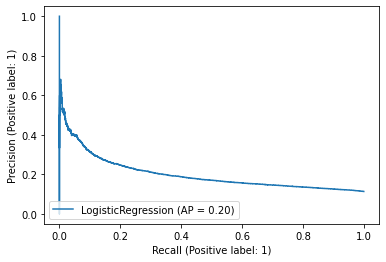

In [37]:
plot_pr_curve(best_baseline[0], X_train[cont_vars], y_train)

### Test Set

In [38]:
print_report(analyse_model( best_baseline[0],  best_baseline[1]['threshold'], X_test[cont_vars], y_test))


               precision    recall  f1-score
           1       0.19      0.38      0.25

    accuracy                           0.74   


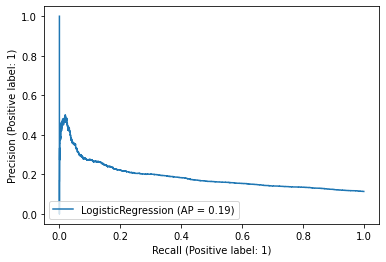

In [39]:
plot_pr_curve(best_baseline[0], X_test[cont_vars], y_test)

### Analysis of Baseline Model Performance
The baseline model had the following metrics:

| Group    | Precision | Recall | f1-score | accuracy |
|----------|-----------|--------|----------|----------|
| Training | 0.19      | 0.39   | 0.26     | 0.74     |
| Test     | 0.19      | 0.38   | 0.25     | 0.74     |

The baseline model performance was consistent between the training and test sets.  

The baseline model had a <b>recall of 38-39%</b> and precision of 18% (f1-score = 25-26%).      

## Final Model

### Training Set

In [40]:
lgrs_proba, best_final = find_best_model((run_lgr_proba,run_lgr_proba_key), C_s, X_train, X_test, y_train, y_test)

1 out of  10 jobs | C:  0.2  | Score:  {'f1': 0.271827, 'recall': 0.5146, 'precision': 0.1847, 'threshold': 0.5181}
2 out of  10 jobs | C:  0.4  | Score:  {'f1': 0.271777, 'recall': 0.487, 'precision': 0.1885, 'threshold': 0.5269}
3 out of  10 jobs | C:  0.6  | Score:  {'f1': 0.271802, 'recall': 0.4904, 'precision': 0.188, 'threshold': 0.526}
4 out of  10 jobs | C:  0.8  | Score:  {'f1': 0.271979, 'recall': 0.4886, 'precision': 0.1884, 'threshold': 0.5267}
5 out of  10 jobs | C:  1.0  | Score:  {'f1': 0.272021, 'recall': 0.4891, 'precision': 0.1884, 'threshold': 0.5266}
6 out of  10 jobs | C:  1.2  | Score:  {'f1': 0.272076, 'recall': 0.485, 'precision': 0.1891, 'threshold': 0.528}
7 out of  10 jobs | C:  1.4  | Score:  {'f1': 0.271938, 'recall': 0.4888, 'precision': 0.1884, 'threshold': 0.5267}
8 out of  10 jobs | C:  1.6  | Score:  {'f1': 0.27183, 'recall': 0.4848, 'precision': 0.1889, 'threshold': 0.528}
9 out of  10 jobs | C:  1.8  | Score:  {'f1': 0.271842, 'recall': 0.4863, 'prec

In [41]:
best_final

(LogisticRegression(C=1.2, class_weight='balanced', solver='liblinear'),
 {'f1': 0.272076, 'recall': 0.485, 'precision': 0.1891, 'threshold': 0.528})

In [46]:
print_report(analyse_model( best_final[0],  best_final[1]['threshold'], X_train, y_train))


               precision    recall  f1-score
           1       0.19      0.48      0.27

    accuracy                           0.71   


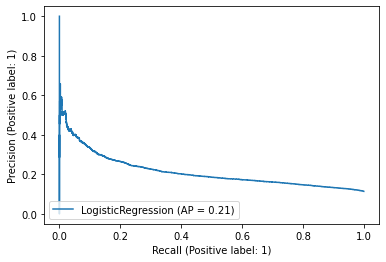

In [42]:
plot_pr_curve(best_final[0], X_train, y_train)

### Test Set

In [49]:
print_report(analyse_model( best_final[0],  best_final[1]['threshold'], X_test, y_test))


               precision    recall  f1-score
           1       0.18      0.47      0.26

    accuracy                           0.70   


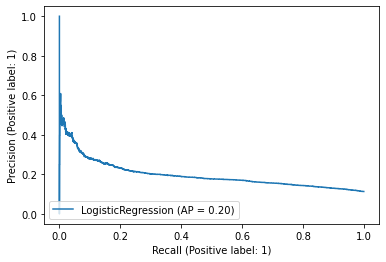

In [50]:
plot_pr_curve(best_final[0], X_test, y_test)

## Model's Performance Analysis <a id='performance-analysis'/>

### Analysis of Final Model Performance
The final model had the following metrics:

| Group    | Precision | Recall | f1-score | accuracy |
|----------|-----------|--------|----------|----------|
| Test     | 0.18      | 0.48   |  0.27    | 0.71     |
| Training | 0.18      | 0.47   |  0.26    | 0.70     |

The final model performance was consistent between the training and test sets.  

The final model had a <b>recall of 47-48%</b> and precision of 18% (f1-score = 26-27%).  This was a 10% incremental improvement in the recall (and a 3-4% drop in accuracy).  The final model accurately predicts approximately 1 in 2 patients that will be readmitted within 30 days.  

# Model Interpretability & Explainability <a id='model-explanation'>

## Baseline Model

### Which variables were more important and why?  How did you come to the conclusion these variables were important how how should the audience interpret this?
The single most important continuous feature in the baseline model was number_inpatient.  This is the number of times a patient was previously admitted to inpatient care, which has a strong positive correlation to being readmitted within 30 days.

In [51]:
feat_coef = []
feat = zip(cont_vars, best_baseline[0].coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat_baseline = feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')

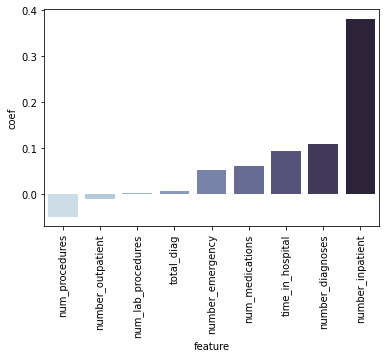

In [52]:
feat_plot = sns.barplot(data=top_feat_baseline, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.show()

## Final Model

### Which variables were more important and why?

The three most important factors were all negatively correlated with readmittance within 30 days:
- Otolaryngology (a.k.a. Ears, Nose, and Throat)
- Gynecology
- Diagnoses for "Complications in Child Birth" (K)   

Input from domain knowledge experts is needed to asses why these variables were the most important and negatively correlated with the response.  

### How did you come to the conclusion these variables were important how how should the audience interpret this?

Variables were assessed for importance after centering & scaling continuous variable and one-hot-encoding categorical variables such that they all range from 0 to 1.  Using this approach, all of the variables are on equivalent scales and can be assessed by their model coefficients.  These coefficients are presented in the bar plot below.     

In [53]:
feat_coef = []
feat = zip(X_train.columns, best_final[0].coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat_final = feat_coef.loc[abs(feat_coef['coef'])>1].sort_values(by='coef')

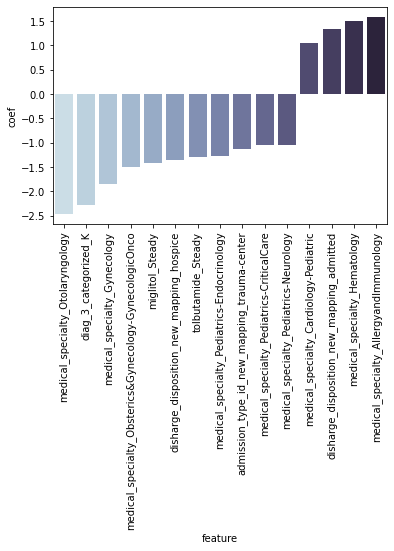

In [55]:
feat_plot = sns.barplot(data=top_feat_final, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.show()

# Conclusion <a id='conclusion'>

### Final Model Proposal <a id='final-model-proposal'/>

We are proposing a classification model that predicts readmittance to the hospital within 30 days with a 25% F1 score (47% Recall and 18% Precision).  This model maximizes the F1 score, maximizing both Recall and Precision in a balanced way such that both patients and hospitals can manage their risk effectively.    

The model helps identify patients at high risk of readmission within 30 days and patients with a low risk of readmission that can be discharged.  Our model identifies top risk factors for readmittance within 30 days which the hospital staff can use as focus areas when deciding to keep or discharge a patient.  This model is not perfect and should be used as a guide rather than gospel.  Additional feature engineering and domain knowledge experts are needed to guide model improvements.        

### Future Considerations and Model Enhancements <a id='model-enhancements'/>

The data were aggregated from multiple hospitals and may not be generalizable across health care systems, geography, etc. Hospitals may want to develop models with their own data or regional data to guide their staff on discharge decisions.  

Need a conversation with stakeholders regarding:
- Balance of precision vs. recall.  What is the cost of a false positive vs. a false negative?  
- Level of detail with diagnoses columns (diag 1-3).  We generalized these diagnoses such that there were fewer levels to model.  We recommend reviewing the top factor recoded diagnoses categories to see if any warrant a deeper dive

### Alternative Modeling Approaches <a id='alternative-modeling-approaches'>

Other classification modeling techniques - Naive Bayes, Random Forest, Boosted Decision Trees